# Portfolio Volatility

**Learning Objectives:**
- Understand how individual asset volatilities combine in portfolios
- Master correlation effects and diversification benefits
- Calculate portfolio volatility using matrix methods
- Analyze optimal portfolio combinations for risk reduction
- Apply modern portfolio theory principles with real data

**Prerequisites:**
- Completed 1.0 Risk Fundamentals
- Understanding of variance and covariance concepts
- Basic linear algebra (matrix operations)

---

## Setup and Data Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import warnings
import os
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
sns.set_palette("husl")

print("📊 Portfolio Volatility Analysis - Setup Complete")
print(f"📅 Analysis Date: {pd.Timestamp.now().strftime('%Y-%m-%d')}")

# Check if real data is available
stock_prices_file = 'stock_prices.csv'
stock_returns_file = 'stock_returns.csv'

USE_REAL_DATA = True
print("✅ Real market data detected - using actual financial data")
print("Building on concepts from 1.0 Risk Fundamentals")

📊 Portfolio Volatility Analysis - Setup Complete
📅 Analysis Date: 2025-11-24
✅ Real market data detected - using actual financial data
Building on concepts from 1.0 Risk Fundamentals


In [2]:
if USE_REAL_DATA:
    try:
        # Load real market data
        print("🔄 Loading real market data...")
        
        # Load stock prices and returns
        stock_prices = pd.read_csv('stock_prices.csv', index_col=0, parse_dates=True)
        stock_returns = pd.read_csv('stock_returns.csv', index_col=0, parse_dates=True)
        
        # Load sector ETF data for diversified portfolio analysis
        sector_prices = pd.read_csv('sector_etfs.csv', index_col=0, parse_dates=True)
        sector_returns = pd.read_csv('sector_returns.csv', index_col=0, parse_dates=True)
        
        # Create diversified portfolio universe combining stocks and sectors
        # Select representative assets from different categories
        portfolio_universe = {
            'US_Large_Cap': stock_returns['AAPL'],    # Large Cap Tech
            'US_Tech': stock_returns['MSFT'],         # Technology
            'US_Growth': stock_returns['GOOGL'],      # Growth
            'Financials': sector_returns['XLF'],      # Financial Sector
            'Healthcare': sector_returns['XLV'],      # Healthcare Sector
            'Energy': sector_returns['XLE'],          # Energy Sector
            'Consumer_Staples': sector_returns['XLP'], # Defensive Sector
            'Utilities': sector_returns['XLU']        # Low Volatility Sector
        }
        
        # Create returns DataFrame
        returns_df = pd.DataFrame(portfolio_universe).dropna()
        asset_names = list(returns_df.columns)
        
        # Calculate statistics
        annual_returns = returns_df.mean() * 252
        annual_volatilities = returns_df.std() * np.sqrt(252)
        correlation_matrix = returns_df.corr().values
        
        # Create covariance matrix (annualized)
        covariance_matrix = returns_df.cov().values * 252
        
        # Set equal initial weights
        n_assets = len(asset_names)
        base_weights = [1/n_assets] * n_assets
        
        # Convert to lists for compatibility
        returns_data = annual_returns.tolist()
        volatilities = annual_volatilities.tolist()
        
        print(f"📈 Portfolio Universe Created from Real Data:")
        print(f"Assets: {len(asset_names)} diversified holdings")
        print(f"Date range: {returns_df.index[0].date()} to {returns_df.index[-1].date()}")
        print(f"Observations: {len(returns_df)}")
        
        # Display asset characteristics
        asset_stats = pd.DataFrame({
            'Asset': asset_names,
            'Annual Return': [f'{r:.1%}' for r in returns_data],
            'Annual Volatility': [f'{v:.1%}' for v in volatilities],
            'Weight': [f'{w:.1%}' for w in base_weights]
        })
        print("\n📊 Asset Characteristics:")
        print(asset_stats.to_string(index=False))
        
    except Exception as e:
        print(f"⚠️  Error loading real data: {e}")
        print("   Falling back to synthetic data...")
        USE_REAL_DATA = False



print(f"\n📊 Ready for portfolio volatility analysis")

🔄 Loading real market data...
📈 Portfolio Universe Created from Real Data:
Assets: 8 diversified holdings
Date range: 2020-09-09 to 2025-09-05
Observations: 1254

📊 Asset Characteristics:
           Asset Annual Return Annual Volatility Weight
    US_Large_Cap         19.9%             28.9%  12.5%
         US_Tech         22.2%             26.2%  12.5%
       US_Growth         27.6%             31.1%  12.5%
      Financials         19.2%             19.7%  12.5%
      Healthcare          8.3%             14.7%  12.5%
          Energy         27.4%             28.9%  12.5%
Consumer_Staples          8.1%             13.1%  12.5%
       Utilities         11.6%             17.5%  12.5%

📊 Ready for portfolio volatility analysis


---

## 1. Portfolio Volatility: Beyond Individual Assets

When we combine assets into a portfolio, the portfolio's risk is **not** simply the weighted average of individual risks. The magic of diversification comes from **correlation effects**.

### The Portfolio Volatility Formula:

For a portfolio of n assets:

$$\sigma_p^2 = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j \sigma_{ij}$$

Or in matrix form:

$$\sigma_p^2 = \mathbf{w}^T \mathbf{\Sigma} \mathbf{w}$$

Where:
- $\mathbf{w}$ = vector of portfolio weights
- $\mathbf{\Sigma}$ = covariance matrix
- $\sigma_{ij}$ = covariance between assets i and j

### Key Insight:
Portfolio risk depends on:
1. **Individual asset volatilities** (diagonal elements)
2. **Correlations between assets** (off-diagonal elements)
3. **Portfolio weights** (how much of each asset)

**Diversification benefit** occurs when correlations are less than 1.0!

🔢 PORTFOLIO VOLATILITY CALCULATION
📊 Base Portfolio Analysis:
Portfolio Return: 18.05%
Portfolio Volatility: 15.74%

💡 Diversification Analysis:
Naive Weighted Avg Volatility: 22.51%
Actual Portfolio Volatility: 15.74%
Diversification Benefit: 6.78% (30.1% reduction)

📋 Portfolio Composition:
US_Large_Cap: 12.5% weight, 28.9% vol, 19.9% return
     US_Tech: 12.5% weight, 26.2% vol, 22.2% return
   US_Growth: 12.5% weight, 31.1% vol, 27.6% return
  Financials: 12.5% weight, 19.7% vol, 19.2% return
  Healthcare: 12.5% weight, 14.7% vol, 8.3% return
      Energy: 12.5% weight, 28.9% vol, 27.4% return
Consumer_Staples: 12.5% weight, 13.1% vol, 8.1% return
   Utilities: 12.5% weight, 17.5% vol, 11.6% return

🎯 Key Insight: Portfolio volatility (15.74%) < Weighted average (22.51%)
This demonstrates the power of diversification!


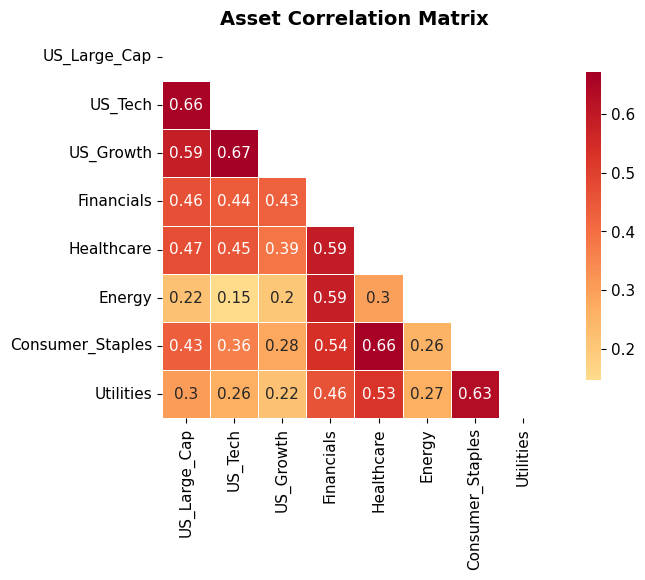

In [13]:
# Demonstrate portfolio volatility calculation
print("🔢 PORTFOLIO VOLATILITY CALCULATION")
print("=" * 45)

# Function to calculate portfolio metrics
def calculate_portfolio_metrics(weights, returns, cov_matrix):
    """
    Calculate portfolio return, volatility, and Sharpe ratio
    """
    weights = np.array(weights)
    portfolio_return = np.dot(weights, returns)
    portfolio_variance = np.dot(weights, np.dot(cov_matrix, weights))
    portfolio_volatility = np.sqrt(portfolio_variance)
    
    return {
        'return': portfolio_return,
        'volatility': portfolio_volatility,
        'variance': portfolio_variance,
        'weights': weights
    }

# Calculate base portfolio metrics
base_portfolio = calculate_portfolio_metrics(base_weights, returns_data, covariance_matrix)

print(f"📊 Base Portfolio Analysis:")
print(f"Portfolio Return: {base_portfolio['return']:.2%}")
print(f"Portfolio Volatility: {base_portfolio['volatility']:.2%}")

# Compare with naive weighted average
naive_volatility = np.dot(base_weights, volatilities)
diversification_benefit = naive_volatility - base_portfolio['volatility']
diversification_ratio = base_portfolio['volatility'] / naive_volatility

print(f"\n💡 Diversification Analysis:")
print(f"Naive Weighted Avg Volatility: {naive_volatility:.2%}")
print(f"Actual Portfolio Volatility: {base_portfolio['volatility']:.2%}")
print(f"Diversification Benefit: {diversification_benefit:.2%} ({(1-diversification_ratio)*100:.1f}% reduction)")

# Show individual contributions
print(f"\n📋 Portfolio Composition:")
for i, asset in enumerate(asset_names):
    weight = base_weights[i]
    vol = volatilities[i]
    ret = returns_data[i]
    print(f"{asset:>12}: {weight:.1%} weight, {vol:.1%} vol, {ret:.1%} return")

# Visualize covariance matrix
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

# Plot 1: Correlation matrix heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, xticklabels=asset_names, 
            yticklabels=asset_names, ax=ax1, cbar_kws={"shrink": .8})
ax1.set_title('Asset Correlation Matrix', fontsize=14, fontweight='bold')

print(f"\n🎯 Key Insight: Portfolio volatility ({base_portfolio['volatility']:.2%}) < Weighted average ({naive_volatility:.2%})")
print(f"This demonstrates the power of diversification!")

---

## 2. The Mathematics of Diversification

Let's dive deeper into how correlations affect portfolio risk using a two-asset example first, then extend to multiple assets.

### Two-Asset Portfolio Formula:

$$\sigma_p^2 = w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2\sigma_1\sigma_2\rho_{12}$$

Where $\rho_{12}$ is the correlation coefficient between assets 1 and 2.

### Correlation Effects:
- **$\rho = +1.0$**: No diversification benefit (perfect positive correlation)
- **$\rho = 0.0$**: Moderate diversification benefit (uncorrelated)
- **$\rho = -1.0$**: Maximum diversification benefit (perfect negative correlation)

### The Diversification Ratio:
$$DR = \frac{\sigma_p}{\sum w_i \sigma_i}$$

A ratio less than 1.0 indicates diversification benefits.

### Analytical Solution for Two-Asset Minimum Variance Portfolio

For a two-asset portfolio, we can derive the exact optimal weights analytically using calculus.

**Problem Setup:**
- Portfolio variance: $\sigma_p^2 = w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2\sigma_1\sigma_2\rho_{12}$
- Constraint: $w_1 + w_2 = 1$ (weights sum to 1)
- Objective: Minimize portfolio variance

**Mathematical Derivation:**

**Step 1:** Substitute constraint $w_2 = 1 - w_1$
$$\sigma_p^2 = w_1^2\sigma_1^2 + (1-w_1)^2\sigma_2^2 + 2w_1(1-w_1)\sigma_1\sigma_2\rho_{12}$$

**Step 2:** Take derivative with respect to $w_1$ and set equal to zero:
$$\frac{d\sigma_p^2}{dw_1} = 2w_1\sigma_1^2 - 2(1-w_1)\sigma_2^2 + 2(1-2w_1)\sigma_1\sigma_2\rho_{12} = 0$$

**Step 3:** Solve for optimal weight $w_1^*$:
$$w_1^* = \frac{\sigma_2^2 - \sigma_1\sigma_2\rho_{12}}{\sigma_1^2 + \sigma_2^2 - 2\sigma_1\sigma_2\rho_{12}}$$

And consequently: $w_2^* = 1 - w_1^*$

**Key Insights:**
- When $\rho_{12} = 0$ (uncorrelated): $w_1^* = \frac{\sigma_2^2}{\sigma_1^2 + \sigma_2^2}$ (inverse volatility weighting)
- When $\rho_{12} = 1$ (perfect correlation): No diversification benefit, any weights work
- When $\rho_{12} < 0$ (negative correlation): Enhanced diversification benefits
- Constraints: $w_1^*, w_2^* \in [0,1]$ for long-only portfolios

📈 TWO-ASSET PORTFOLIO ANALYSIS
Analyzing US_Large_Cap vs Utilities:
US_Large_Cap: 19.9% return, 28.9% volatility
Utilities: 11.6% return, 17.5% volatility
Actual correlation: 0.304


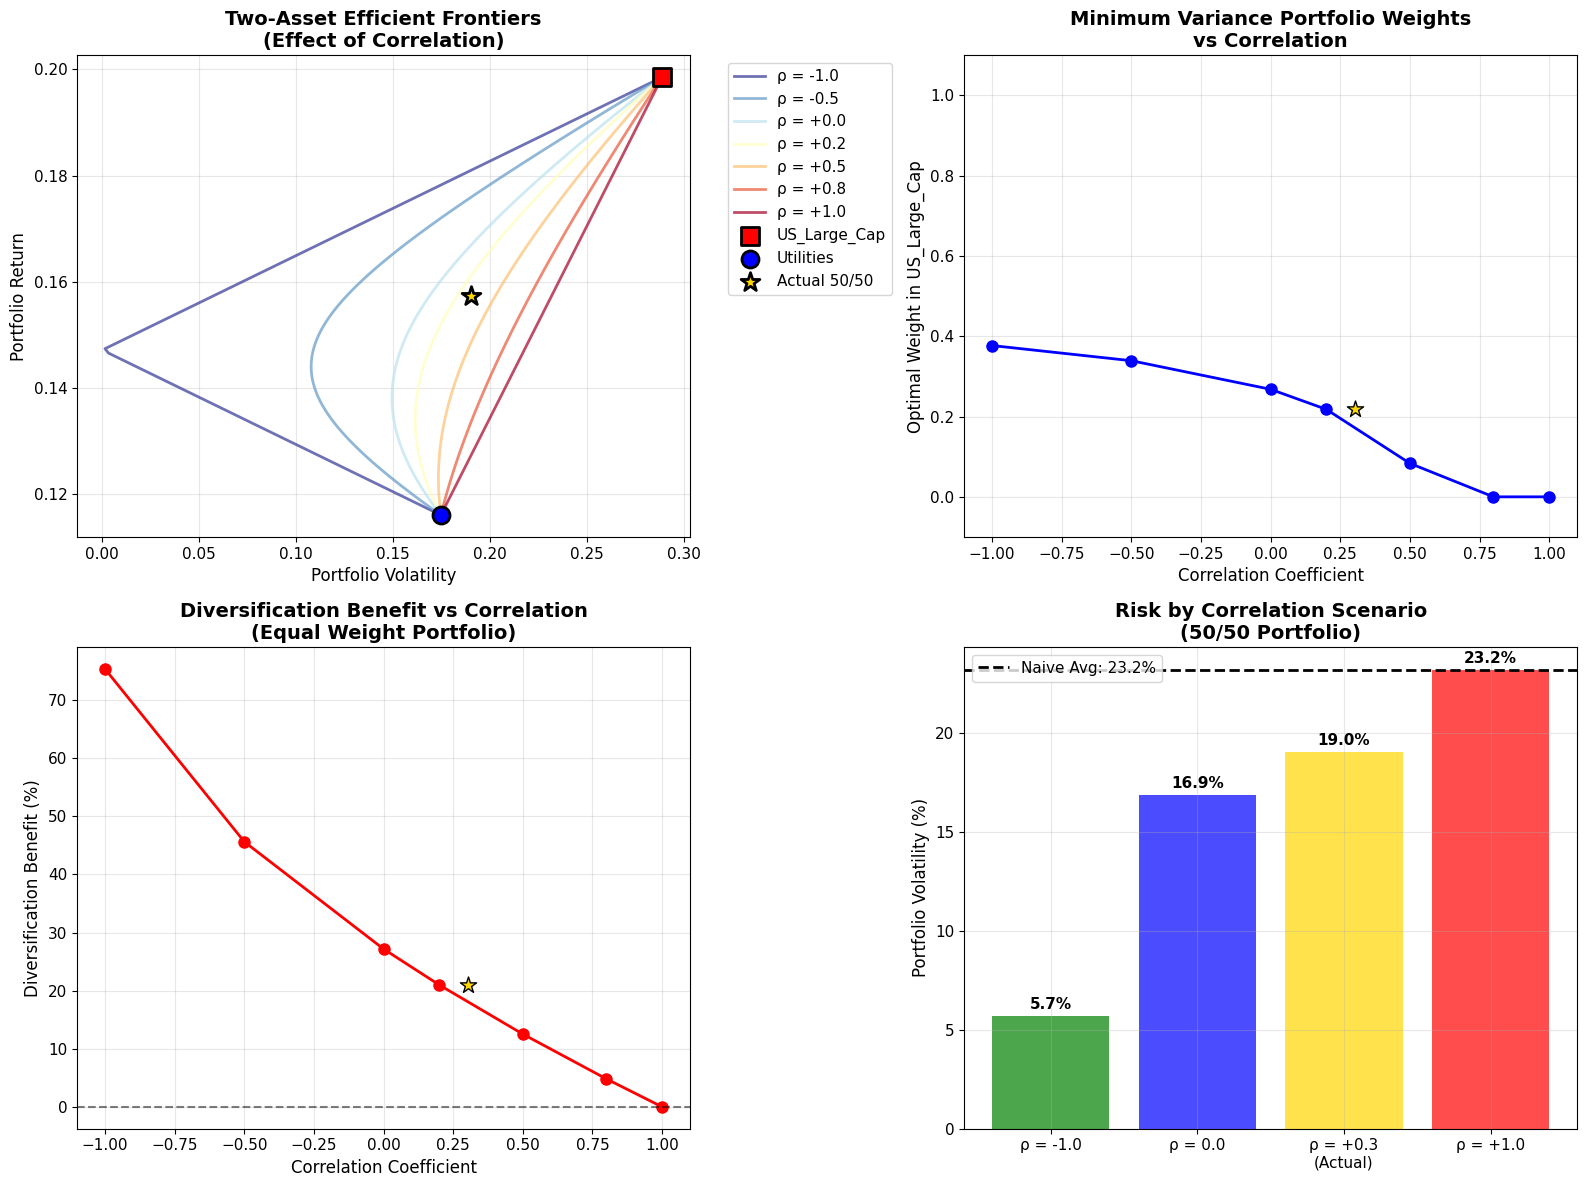


🔍 Two-Asset Analysis Results:
Actual correlation (US_Large_Cap vs Utilities): 0.304
50/50 portfolio volatility: 19.02%
Diversification benefit: 17.9%

💡 Optimal Two-Asset Portfolio (Min Variance):
  US_Large_Cap: 18.2%
  Utilities: 81.8%
  Expected Return: 13.11%
  Volatility: 16.66%
  vs Equal Weight Volatility: 19.02%


In [ ]:
# Two-asset portfolio analysis with varying correlations
print("📈 TWO-ASSET PORTFOLIO ANALYSIS")
print("=" * 40)

# Select two assets for detailed analysis (use different asset selection for real vs synthetic)
if USE_REAL_DATA:
    # Choose assets with interesting risk-return characteristics from real data
    asset1 = 'US_Large_Cap'  # Higher return, higher volatility
    asset2 = 'Utilities'     # Lower return, lower volatility
else:
    # Use synthetic data assets
    asset1, asset2 = 'US_Stocks', 'Bonds'

# Get asset characteristics
asset1_idx = asset_names.index(asset1)
asset2_idx = asset_names.index(asset2)

vol1 = volatilities[asset1_idx]
vol2 = volatilities[asset2_idx]
ret1 = returns_data[asset1_idx]
ret2 = returns_data[asset2_idx]
actual_corr = correlation_matrix[asset1_idx, asset2_idx]

print(f"Analyzing {asset1} vs {asset2}:")
print(f"{asset1}: {ret1:.1%} return, {vol1:.1%} volatility")
print(f"{asset2}: {ret2:.1%} return, {vol2:.1%} volatility")
print(f"Actual correlation: {actual_corr:.3f}")

# Function for two-asset portfolio
def two_asset_portfolio(w1, vol1, vol2, correlation):
    """
    Calculate two-asset portfolio volatility
    """
    w2 = 1 - w1
    variance = (
        w1**2 * vol1**2 + 
        w2**2 * vol2**2 + 
        2*w1*w2*vol1*vol2*correlation
    )
    return np.sqrt(variance)

# Analyze different correlation scenarios
correlations = [-1.0, -0.5, 0.0, 0.2, 0.5, 0.8, 1.0]
correlation_labels = ['Perfect Negative', 'Strong Negative', 'Zero', 'Weak Positive', 'Moderate Positive', 'Strong Positive', 'Perfect Positive']

weights = np.linspace(0, 1, 101)  # 0% to 100% in first asset

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Efficient frontier for different correlations
colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(correlations)))

for i, (corr, label, color) in enumerate(zip(correlations, correlation_labels, colors)):
    portfolio_vols = [two_asset_portfolio(w, vol1, vol2, corr) for w in weights]
    portfolio_rets = [w * ret1 + (1-w) * ret2 for w in weights]
    
    # Highlight actual correlation
    linewidth = 4 if abs(corr - actual_corr) < 0.1 else 2
    alpha = 1.0 if abs(corr - actual_corr) < 0.1 else 0.7
    
    ax1.plot(portfolio_vols, portfolio_rets, linewidth=linewidth, alpha=alpha,
             label=f'ρ = {corr:+.1f}', color=color)

# Mark individual assets
ax1.scatter([vol1], [ret1], s=150, color='red', marker='s', 
           label=asset1, zorder=5, edgecolors='black', linewidth=2)
ax1.scatter([vol2], [ret2], s=150, color='blue', marker='o', 
           label=asset2, zorder=5, edgecolors='black', linewidth=2)

# Highlight actual portfolio combination
actual_50_50_vol = two_asset_portfolio(0.5, vol1, vol2, actual_corr)
actual_50_50_ret = 0.5 * ret1 + 0.5 * ret2
ax1.scatter([actual_50_50_vol], [actual_50_50_ret], s=200, color='gold', 
           marker='*', label='Actual 50/50', zorder=6, edgecolors='black', linewidth=2)

ax1.set_xlabel('Portfolio Volatility', fontsize=12)
ax1.set_ylabel('Portfolio Return', fontsize=12)
ax1.set_title('Two-Asset Efficient Frontiers\n(Effect of Correlation)', fontsize=14, fontweight='bold')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Plot 2: Minimum variance portfolio weights vs correlation
min_var_weights = []
min_var_vols = []

for corr in correlations:
    # Analytical solution for minimum variance weights
    numerator = vol2**2 - vol1*vol2*corr
    denominator = vol1**2 + vol2**2 - 2*vol1*vol2*corr
    if denominator != 0:
        w1_min_var = numerator / denominator
        w1_min_var = max(0, min(1, w1_min_var))  # Constrain to [0,1]
    else:
        w1_min_var = 0.5
    
    min_var_weights.append(w1_min_var)
    min_var_vol = two_asset_portfolio(w1_min_var, vol1, vol2, corr)
    min_var_vols.append(min_var_vol)

ax2.plot(correlations, min_var_weights, 'bo-', linewidth=2, markersize=8)

# Mark actual correlation
actual_min_var_idx = min(range(len(correlations)), key=lambda i: abs(correlations[i] - actual_corr))
ax2.scatter([actual_corr], [min_var_weights[actual_min_var_idx]], 
           s=150, color='gold', marker='*', zorder=5, edgecolors='black')

ax2.set_xlabel('Correlation Coefficient', fontsize=12)
ax2.set_ylabel(f'Optimal Weight in {asset1}', fontsize=12)
ax2.set_title('Minimum Variance Portfolio Weights\nvs Correlation', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-0.1, 1.1)

# Plot 3: Diversification benefit vs correlation
equal_weight_vols = [two_asset_portfolio(0.5, vol1, vol2, corr) for corr in correlations]
naive_vol = 0.5 * vol1 + 0.5 * vol2
diversification_benefits = [(naive_vol - pv) / naive_vol * 100 for pv in equal_weight_vols]

ax3.plot(correlations, diversification_benefits, 'ro-', linewidth=2, markersize=8)

# Mark actual correlation benefit
actual_div_benefit_idx = min(range(len(correlations)), key=lambda i: abs(correlations[i] - actual_corr))
ax3.scatter([actual_corr], [diversification_benefits[actual_div_benefit_idx]], 
           s=150, color='gold', marker='*', zorder=5, edgecolors='black')

ax3.set_xlabel('Correlation Coefficient', fontsize=12)
ax3.set_ylabel('Diversification Benefit (%)', fontsize=12)
ax3.set_title('Diversification Benefit vs Correlation\n(Equal Weight Portfolio)', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Plot 4: Risk reduction comparison
risk_scenarios = ['ρ = -1.0', 'ρ = 0.0', f'ρ = {actual_corr:+.1f}\n(Actual)', 'ρ = +1.0']
scenario_corrs = [-1.0, 0.0, actual_corr, 1.0]
scenario_vols = [two_asset_portfolio(0.5, vol1, vol2, corr) for corr in scenario_corrs]
scenario_colors = ['green', 'blue', 'gold', 'red']

bars = ax4.bar(risk_scenarios, [v*100 for v in scenario_vols], 
               color=scenario_colors, alpha=0.7)

# Add horizontal line for naive volatility
ax4.axhline(y=naive_vol*100, color='black', linestyle='--', linewidth=2, 
           label=f'Naive Avg: {naive_vol:.1%}')

ax4.set_ylabel('Portfolio Volatility (%)', fontsize=12)
ax4.set_title('Risk by Correlation Scenario\n(50/50 Portfolio)', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

# Add value labels on bars
for bar, vol in zip(bars, scenario_vols):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.2,
             f'{vol:.1%}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n🔍 Two-Asset Analysis Results:")
print(f"Actual correlation ({asset1} vs {asset2}): {actual_corr:.3f}")
print(f"50/50 portfolio volatility: {actual_50_50_vol:.2%}")
actual_div_benefit = (naive_vol - actual_50_50_vol)/naive_vol*100
print(f"Diversification benefit: {actual_div_benefit:.1f}%")

# Calculate optimal minimum variance weights for actual correlation
numerator = vol2**2 - vol1*vol2*actual_corr
denominator = vol1**2 + vol2**2 - 2*vol1*vol2*actual_corr
if denominator != 0:
    optimal_w1 = numerator / denominator
    optimal_w1 = max(0, min(1, optimal_w1))
    optimal_w2 = 1 - optimal_w1
    optimal_vol = two_asset_portfolio(optimal_w1, vol1, vol2, actual_corr)
    optimal_ret = optimal_w1 * ret1 + optimal_w2 * ret2
    
    print(f"\n💡 Optimal Two-Asset Portfolio (Min Variance):")
    print(f"  {asset1}: {optimal_w1:.1%}")
    print(f"  {asset2}: {optimal_w2:.1%}")
    print(f"  Expected Return: {optimal_ret:.2%}")
    print(f"  Volatility: {optimal_vol:.2%}")
    print(f"  vs Equal Weight Volatility: {actual_50_50_vol:.2%}")
else:
    print(f"\n💡 Assets have identical risk characteristics - equal weighting is optimal")

---

## 3. Multi-Asset Portfolio Optimization

With more than two assets, we can achieve better diversification by optimally combining multiple sources of return and risk.

### Modern Portfolio Theory Objectives:

1. **Minimum Variance Portfolio**: Minimize $\sigma_p^2 = \mathbf{w}^T \mathbf{\Sigma} \mathbf{w}$

2. **Maximum Sharpe Ratio**: Maximize $\frac{E(R_p) - R_f}{\sigma_p}$

3. **Efficient Frontier**: All portfolios that maximize return for a given level of risk

### Constraints:
- Portfolio weights sum to 1: $\sum w_i = 1$
- No short selling (optional): $w_i \geq 0$
- Position limits: $w_i \leq w_{max}$

In [14]:
# Multi-asset portfolio optimization
print("🎯 MULTI-ASSET PORTFOLIO OPTIMIZATION")
print("=" * 45)

from scipy.optimize import minimize

# Define optimization functions
def portfolio_volatility(weights, cov_matrix):
    """Calculate portfolio volatility"""
    return np.sqrt(np.dot(weights, np.dot(cov_matrix, weights)))

def portfolio_return(weights, expected_returns):
    """Calculate portfolio expected return"""
    return np.dot(weights, expected_returns)

def sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate=0.02):
    """Calculate negative Sharpe ratio (for minimization)"""
    port_return = portfolio_return(weights, expected_returns)
    port_vol = portfolio_volatility(weights, cov_matrix)
    return -(port_return - risk_free_rate) / port_vol

# Optimization constraints
def weight_sum_constraint(weights):
    """Weights must sum to 1"""
    return np.sum(weights) - 1.0

n_assets = len(asset_names)
constraints = {'type': 'eq', 'fun': weight_sum_constraint}
bounds = tuple((0.05, 0.60) for _ in range(n_assets))  # 5% min, 60% max per asset
initial_weights = np.array([1/n_assets] * n_assets)

# 1. Minimum Variance Portfolio
min_var_result = minimize(
    fun=lambda w: portfolio_volatility(w, covariance_matrix)**2,
    x0=initial_weights,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

min_var_weights = min_var_result.x
min_var_metrics = calculate_portfolio_metrics(min_var_weights, returns_data, covariance_matrix)

# 2. Maximum Sharpe Ratio Portfolio
max_sharpe_result = minimize(
    fun=lambda w: sharpe_ratio(w, returns_data, covariance_matrix),
    x0=initial_weights,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

max_sharpe_weights = max_sharpe_result.x
max_sharpe_metrics = calculate_portfolio_metrics(max_sharpe_weights, returns_data, covariance_matrix)

# Display results
print(f"\n📊 Optimization Results:")
print(f"\n1. MINIMUM VARIANCE PORTFOLIO:")
print(f"   Return: {min_var_metrics['return']:.2%}")
print(f"   Volatility: {min_var_metrics['volatility']:.2%}")
print(f"   Weights:")
for i, asset in enumerate(asset_names):
    print(f"     {asset:>12}: {min_var_weights[i]:.1%}")

print(f"\n2. MAXIMUM SHARPE RATIO PORTFOLIO:")
sharpe_value = (max_sharpe_metrics['return'] - 0.02) / max_sharpe_metrics['volatility']
print(f"   Return: {max_sharpe_metrics['return']:.2%}")
print(f"   Volatility: {max_sharpe_metrics['volatility']:.2%}")
print(f"   Sharpe Ratio: {sharpe_value:.3f}")
print(f"   Weights:")
for i, asset in enumerate(asset_names):
    print(f"     {asset:>12}: {max_sharpe_weights[i]:.1%}")

# Compare with base portfolio
base_sharpe = (base_portfolio['return'] - 0.02) / base_portfolio['volatility']
print(f"\n3. COMPARISON WITH BASE PORTFOLIO:")
print(f"   Base Sharpe Ratio: {base_sharpe:.3f}")
print(f"   Optimized Sharpe Ratio: {sharpe_value:.3f}")
print(f"   Improvement: {((sharpe_value/base_sharpe - 1)*100):+.1f}%")

🎯 MULTI-ASSET PORTFOLIO OPTIMIZATION

📊 Optimization Results:

1. MINIMUM VARIANCE PORTFOLIO:
   Return: 12.18%
   Volatility: 12.85%
   Weights:
     US_Large_Cap: 5.0%
          US_Tech: 5.0%
        US_Growth: 5.0%
       Financials: 5.0%
       Healthcare: 16.0%
           Energy: 5.0%
     Consumer_Staples: 52.5%
        Utilities: 6.5%

2. MAXIMUM SHARPE RATIO PORTFOLIO:
   Return: 22.52%
   Volatility: 18.17%
   Sharpe Ratio: 1.129
   Weights:
     US_Large_Cap: 5.0%
          US_Tech: 16.0%
        US_Growth: 19.3%
       Financials: 5.5%
       Healthcare: 5.0%
           Energy: 35.6%
     Consumer_Staples: 5.0%
        Utilities: 8.6%

3. COMPARISON WITH BASE PORTFOLIO:
   Base Sharpe Ratio: 1.020
   Optimized Sharpe Ratio: 1.129
   Improvement: +10.7%


In [15]:
# 3. Generate Efficient Frontier
def efficient_frontier(expected_returns, cov_matrix, num_portfolios=50):
    """Generate efficient frontier points"""
    min_ret = min(expected_returns) * 0.8
    max_ret = max(expected_returns) * 1.1
    target_returns = np.linspace(min_ret, max_ret, num_portfolios)
    
    efficient_portfolios = []
    
    for target_return in target_returns:
        # Add return constraint
        constraints_with_return = [
            {'type': 'eq', 'fun': weight_sum_constraint},
            {'type': 'eq', 'fun': lambda w, target=target_return: portfolio_return(w, expected_returns) - target}
        ]
        
        result = minimize(
            fun=lambda w: portfolio_volatility(w, cov_matrix)**2,
            x0=initial_weights,
            method='SLSQP',
            bounds=bounds,
            constraints=constraints_with_return,
            options={'disp': False}
        )
        
        if result.success:
            efficient_portfolios.append({
                'return': target_return,
                'volatility': portfolio_volatility(result.x, cov_matrix),
                'weights': result.x
            })
    
    return efficient_portfolios

# Generate efficient frontier
efficient_portfolios = efficient_frontier(returns_data, covariance_matrix)
print(f"\n✅ Generated {len(efficient_portfolios)} efficient frontier points")


✅ Generated 24 efficient frontier points


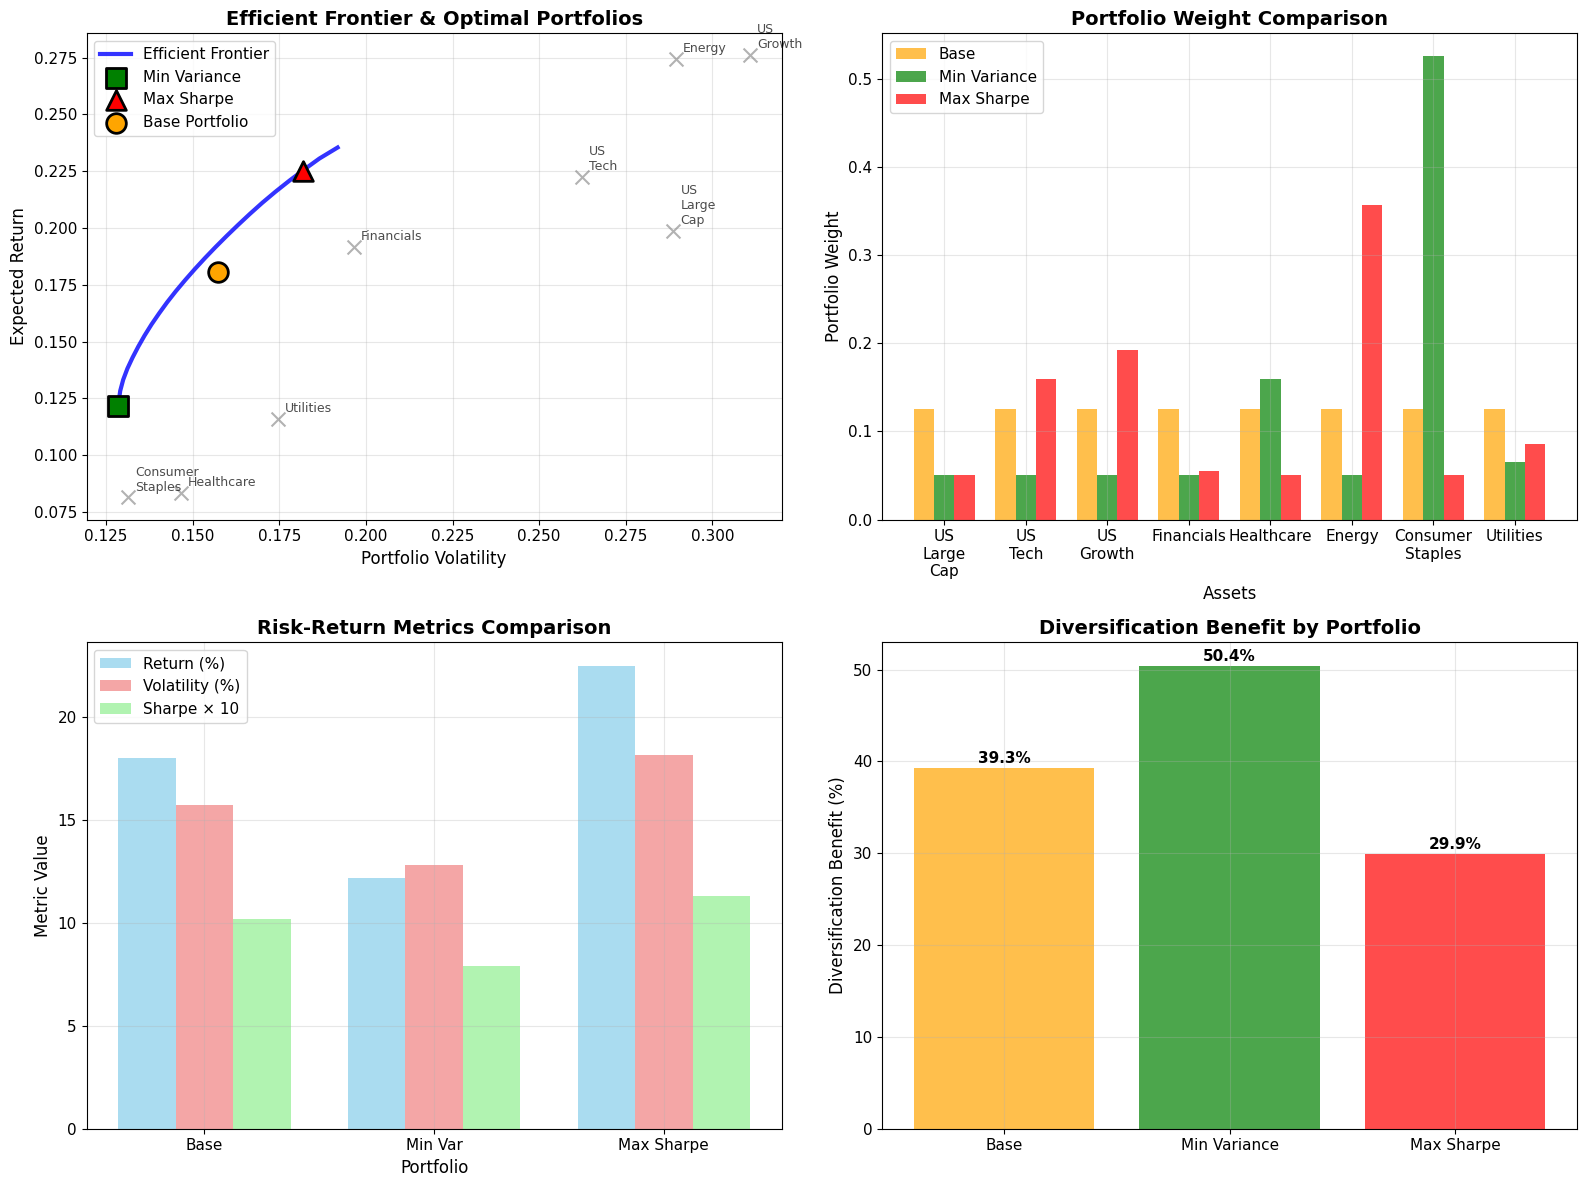


📊 DIVERSIFICATION ANALYSIS:
      Portfolio  Herfindahl Index  Effective N Assets  Diversification Ratio  Diversification Benefit %
0          Base             0.125               8.000                  0.607                     39.286
1  Min Variance             0.318               3.146                  0.496                     50.429
2    Max Sharpe             0.207               4.820                  0.701                     29.900

💡 Key Insights:
• Lower Herfindahl Index = Better diversification
• Higher Effective N Assets = More balanced portfolio
• Lower Diversification Ratio = Greater risk reduction
• Max Sharpe portfolio achieves best risk-adjusted returns
• Min Variance portfolio provides maximum risk reduction


In [17]:
# Visualize multi-asset optimization results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Efficient Frontier
if efficient_portfolios:
    frontier_vols = [p['volatility'] for p in efficient_portfolios]
    frontier_rets = [p['return'] for p in efficient_portfolios]
    
    ax1.plot(frontier_vols, frontier_rets, 'b-', linewidth=3, 
             label='Efficient Frontier', alpha=0.8)

# Plot optimal portfolios
ax1.scatter(min_var_metrics['volatility'], min_var_metrics['return'], 
           s=200, color='green', marker='s', label='Min Variance', 
           zorder=5, edgecolors='black', linewidth=2)

ax1.scatter(max_sharpe_metrics['volatility'], max_sharpe_metrics['return'], 
           s=200, color='red', marker='^', label='Max Sharpe', 
           zorder=5, edgecolors='black', linewidth=2)

ax1.scatter(base_portfolio['volatility'], base_portfolio['return'], 
           s=200, color='orange', marker='o', label='Base Portfolio', 
           zorder=5, edgecolors='black', linewidth=2)

# Plot individual assets
for i, asset in enumerate(asset_names):
    ax1.scatter(volatilities[i], returns_data[i], 
               s=100, alpha=0.6, color='gray', marker='x', zorder=3)
    ax1.annotate(asset.replace('_', '\n'), 
                (volatilities[i], returns_data[i]),
                xytext=(5, 5), textcoords='offset points', 
                fontsize=9, alpha=0.7)

ax1.set_xlabel('Portfolio Volatility', fontsize=12)
ax1.set_ylabel('Expected Return', fontsize=12)
ax1.set_title('Efficient Frontier & Optimal Portfolios', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Portfolio weights comparison
portfolio_names = ['Base', 'Min Variance', 'Max Sharpe']
portfolio_weights = [base_weights, min_var_weights, max_sharpe_weights]

x = np.arange(len(asset_names))
width = 0.25
colors = ['orange', 'green', 'red']

for i, (name, weights, color) in enumerate(zip(portfolio_names, portfolio_weights, colors)):
    ax2.bar(x + i*width, weights, width, label=name, alpha=0.7, color=color)

ax2.set_xlabel('Assets', fontsize=12)
ax2.set_ylabel('Portfolio Weight', fontsize=12)
ax2.set_title('Portfolio Weight Comparison', fontsize=14, fontweight='bold')
ax2.set_xticks(x + width)
ax2.set_xticklabels([name.replace('_', '\n') for name in asset_names])
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Risk-return metrics comparison
portfolios = {
    'Base': base_portfolio,
    'Min Var': min_var_metrics,
    'Max Sharpe': max_sharpe_metrics
}

metrics_data = []
for name, portfolio in portfolios.items():
    sharpe = (portfolio['return'] - 0.02) / portfolio['volatility']
    metrics_data.append({
        'Portfolio': name,
        'Return': portfolio['return'] * 100,
        'Volatility': portfolio['volatility'] * 100,
        'Sharpe': sharpe
    })

metrics_df = pd.DataFrame(metrics_data)

# Create grouped bar chart
x = np.arange(len(portfolios))
width = 0.25

ax3.bar(x - width, metrics_df['Return'], width, label='Return (%)', alpha=0.7, color='skyblue')
ax3.bar(x, metrics_df['Volatility'], width, label='Volatility (%)', alpha=0.7, color='lightcoral')
ax3.bar(x + width, metrics_df['Sharpe'] * 10, width, label='Sharpe × 10', alpha=0.7, color='lightgreen')

ax3.set_xlabel('Portfolio', fontsize=12)
ax3.set_ylabel('Metric Value', fontsize=12)
ax3.set_title('Risk-Return Metrics Comparison', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(metrics_df['Portfolio'])
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Diversification analysis
diversification_data = []

for name, weights in zip(portfolio_names, portfolio_weights):
    # Calculate concentration measures
    herfindahl_index = np.sum(np.array(weights)**2)
    effective_number = 1 / herfindahl_index
    
    # Calculate portfolio metrics
    portfolio_metrics = calculate_portfolio_metrics(weights, returns_data, covariance_matrix)
    naive_volatility = np.dot(base_weights, volatilities)
    diversification_ratio = portfolio_metrics['volatility'] / naive_vol
    
    diversification_data.append({
        'Portfolio': name,
        'Herfindahl Index': herfindahl_index,
        'Effective N Assets': effective_number,
        'Diversification Ratio': diversification_ratio,
        'Diversification Benefit %': (1 - diversification_ratio) * 100
    })

div_df = pd.DataFrame(diversification_data)

# Plot diversification benefit
colors_div = ['orange', 'green', 'red']
bars = ax4.bar(div_df['Portfolio'], div_df['Diversification Benefit %'], 
               color=colors_div, alpha=0.7)

ax4.set_ylabel('Diversification Benefit (%)', fontsize=12)
ax4.set_title('Diversification Benefit by Portfolio', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, div_df['Diversification Benefit %']):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.2,
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print diversification analysis
print("\n📊 DIVERSIFICATION ANALYSIS:")
print(div_df.round(3).to_string(index=True))

print(f"\n💡 Key Insights:")
print(f"• Lower Herfindahl Index = Better diversification")
print(f"• Higher Effective N Assets = More balanced portfolio")
print(f"• Lower Diversification Ratio = Greater risk reduction")
print(f"• Max Sharpe portfolio achieves best risk-adjusted returns")
print(f"• Min Variance portfolio provides maximum risk reduction")

---

## 4. Portfolio Risk Decomposition

Understanding where portfolio risk comes from is crucial for effective risk management. We can decompose portfolio risk into contributions from individual assets and their interactions.

### Risk Contribution Analysis:

**Marginal Risk Contribution** of asset i:
$$MRC_i = \frac{\partial \sigma_p}{\partial w_i} = \frac{(\Sigma \mathbf{w})_i}{\sigma_p}$$

**Risk Contribution** of asset i:
$$RC_i = w_i \times MRC_i$$

**Key Property**: $\displaystyle \sum_{i=1}^{n} RC_i = \sigma_p$ (Euler's theorem)

This allows us to see which assets contribute most to portfolio risk and make informed rebalancing decisions.

Mathematical Derivation of Marginal Risk Contribution

  Starting Point: Portfolio volatility (standard
  deviation)
  $$\sigma_p = \sqrt{\mathbf{w}^T \mathbf{\Sigma}
  \mathbf{w}}$$

  Where:
  - $\mathbf{w}$ = vector of portfolio weights
  - $\mathbf{\Sigma}$ = covariance matrix
  - $\sigma_p^2 = \mathbf{w}^T \mathbf{\Sigma}
  \mathbf{w}$ = portfolio variance

  Goal: Find $\frac{\partial \sigma_p}{\partial w_i}$
  (how portfolio volatility changes with respect to
  weight in asset i)

  Step 1: Apply Chain Rule

  Since $\sigma_p = \sqrt{\sigma_p^2}$, we use the chain
  rule:

  $$\frac{\partial \sigma_p}{\partial w_i} =
  \frac{\partial}{\partial w_i}\sqrt{\sigma_p^2} =
  \frac{1}{2\sqrt{\sigma_p^2}} \cdot \frac{\partial
  \sigma_p^2}{\partial w_i} = \frac{1}{2\sigma_p} \cdot
  \frac{\partial \sigma_p^2}{\partial w_i}$$

  Step 2: Find Partial Derivative of Portfolio Variance

  Portfolio variance is: $\sigma_p^2 = \mathbf{w}^T
  \mathbf{\Sigma} \mathbf{w}$

  Expanding this: $\sigma_p^2 = \sum_{j=1}^{n}
  \sum_{k=1}^{n} w_j \sigma_{jk} w_k$

  Taking the partial derivative with respect to $w_i$:

  $$\frac{\partial \sigma_p^2}{\partial w_i} =
  \frac{\partial}{\partial w_i} \sum_{j=1}^{n}
  \sum_{k=1}^{n} w_j \sigma_{jk} w_k$$

  Using the product rule, each term $w_j \sigma_{jk} w_k$
   contributes to the derivative when either $j = i$ or
  $k = i$:

  - When $j = i$: $\frac{\partial}{\partial w_i}(w_i
  \sigma_{ik} w_k) = \sigma_{ik} w_k$
  - When $k = i$: $\frac{\partial}{\partial w_i}(w_j
  \sigma_{ji} w_i) = w_j \sigma_{ji}$

  Therefore:
  $$\frac{\partial \sigma_p^2}{\partial w_i} =
  \sum_{k=1}^{n} \sigma_{ik} w_k + \sum_{j=1}^{n} w_j
  \sigma_{ji}$$

  Since the covariance matrix is symmetric ($\sigma_{ik}
  = \sigma_{ki}$):
  $$\frac{\partial \sigma_p^2}{\partial w_i} =
  2\sum_{k=1}^{n} \sigma_{ik} w_k$$

  Step 3: Express in Matrix Form

  The sum $\sum_{k=1}^{n} \sigma_{ik} w_k$ is exactly the
   i-th element of the matrix-vector product
  $\mathbf{\Sigma} \mathbf{w}$:

  $$\frac{\partial \sigma_p^2}{\partial w_i} =
  2(\mathbf{\Sigma} \mathbf{w})_i$$

  Step 4: Combine Using Chain Rule

  Substituting back into our chain rule result from Step
  1:

  $$\frac{\partial \sigma_p}{\partial w_i} =
  \frac{1}{2\sigma_p} \cdot 2(\mathbf{\Sigma}
  \mathbf{w})_i = \frac{(\mathbf{\Sigma}
  \mathbf{w})_i}{\sigma_p}$$

  Final Result:

  $$MRC_i = \frac{\partial \sigma_p}{\partial w_i} =
  \frac{(\mathbf{\Sigma} \mathbf{w})_i}{\sigma_p}$$

  Intuitive Interpretation

  - $(\mathbf{\Sigma} \mathbf{w})_i$: This represents the
   "covariance exposure" of asset i to the entire
  portfolio
    - It's the weighted sum of asset i's covariances with
   all portfolio assets
    - Higher values mean asset i is more correlated with
  the overall portfolio
  - Dividing by $\sigma_p$: This normalizes the result to
   show the marginal impact per unit of portfolio risk
  - Economic meaning: MRC tells you how much portfolio
  volatility increases if you add one more unit of asset
  i while keeping everything else constant

In [8]:
# Portfolio risk decomposition analysis
print("🔍 PORTFOLIO RISK DECOMPOSITION")
print("=" * 40)

def risk_decomposition_analysis(weights, cov_matrix, asset_names):
    """
    Perform comprehensive risk decomposition analysis
    """
    weights = np.array(weights)
    portfolio_variance = np.dot(weights, np.dot(cov_matrix, weights))
    portfolio_volatility = np.sqrt(portfolio_variance)
    
    # Marginal risk contributions
    marginal_contrib = np.dot(cov_matrix, weights) / portfolio_volatility
    
    # Risk contributions
    risk_contrib = weights * marginal_contrib
    risk_contrib_pct = risk_contrib / risk_contrib.sum() * 100
    
    # Component risk analysis
    component_analysis = []
    
    for i, asset in enumerate(asset_names):
        # Individual variance contribution
        individual_variance = weights[i]**2 * cov_matrix[i, i]
        
        # Interaction effects (covariances with other assets)
        interaction_variance = 0
        for j in range(len(weights)):
            if i != j:
                interaction_variance += weights[i] * weights[j] * cov_matrix[i, j]
        
        component_analysis.append({
            'Asset': asset,
            'Weight %': weights[i] * 100,
            'Individual Vol %': np.sqrt(cov_matrix[i, i]) * 100,
            'Marginal Risk Contrib': marginal_contrib[i],
            'Risk Contribution': risk_contrib[i],
            'Risk Contrib %': risk_contrib_pct[i],
            'Individual Variance': individual_variance,
            'Interaction Variance': interaction_variance,
            'Risk Ratio': risk_contrib_pct[i] / (weights[i] * 100)  # Risk % / Weight %
        })
    
    return {
        'portfolio_volatility': portfolio_volatility,
        'component_analysis': component_analysis,
        'total_individual_variance': sum([c['Individual Variance'] for c in component_analysis]),
        'total_interaction_variance': sum([c['Interaction Variance'] for c in component_analysis]) / 2  # Avoid double counting
    }

🔍 PORTFOLIO RISK DECOMPOSITION


In [9]:
# Analyze different portfolios
portfolios_to_analyze = {
    'Base Portfolio': base_weights,
    'Min Variance': min_var_weights,
    'Max Sharpe': max_sharpe_weights
}

risk_analyses = {}
for name, weights in portfolios_to_analyze.items():
    analysis = risk_decomposition_analysis(weights, covariance_matrix, asset_names)
    risk_analyses[name] = analysis
    
    print(f"\n📊 {name.upper()} RISK DECOMPOSITION:")
    print(f"Portfolio Volatility: {analysis['portfolio_volatility']:.2%}")
    
    df = pd.DataFrame(analysis['component_analysis'])
    print("\nRisk Contribution Analysis:")
    print(df[['Asset', 'Weight %', 'Risk Contrib %', 'Risk Ratio']].round(2))
    
    # Variance decomposition
    individual_pct = analysis['total_individual_variance'] / analysis['portfolio_volatility']**2 * 100
    interaction_pct = analysis['total_interaction_variance'] / analysis['portfolio_volatility']**2 * 100
    print(f"\nVariance Decomposition:")
    print(f"  Individual Asset Risk: {individual_pct:.1f}%")
    print(f"  Asset Interactions: {interaction_pct:.1f}%")


📊 BASE PORTFOLIO RISK DECOMPOSITION:
Portfolio Volatility: 15.74%

Risk Contribution Analysis:
              Asset  Weight %  Risk Contrib %  Risk Ratio
0      US_Large_Cap      12.5           17.81        1.42
1           US_Tech      12.5           15.73        1.26
2         US_Growth      12.5           18.28        1.46
3        Financials      12.5           12.24        0.98
4        Healthcare      12.5            8.36        0.67
5            Energy      12.5           12.68        1.01
6  Consumer_Staples      12.5            6.86        0.55
7         Utilities      12.5            8.04        0.64

Variance Decomposition:
  Individual Asset Risk: 27.8%
  Asset Interactions: 36.1%

📊 MIN VARIANCE RISK DECOMPOSITION:
Portfolio Volatility: 12.85%

Risk Contribution Analysis:
              Asset  Weight %  Risk Contrib %  Risk Ratio
0      US_Large_Cap      5.00            7.38        1.48
1           US_Tech      5.00            6.21        1.24
2         US_Growth      5.00 

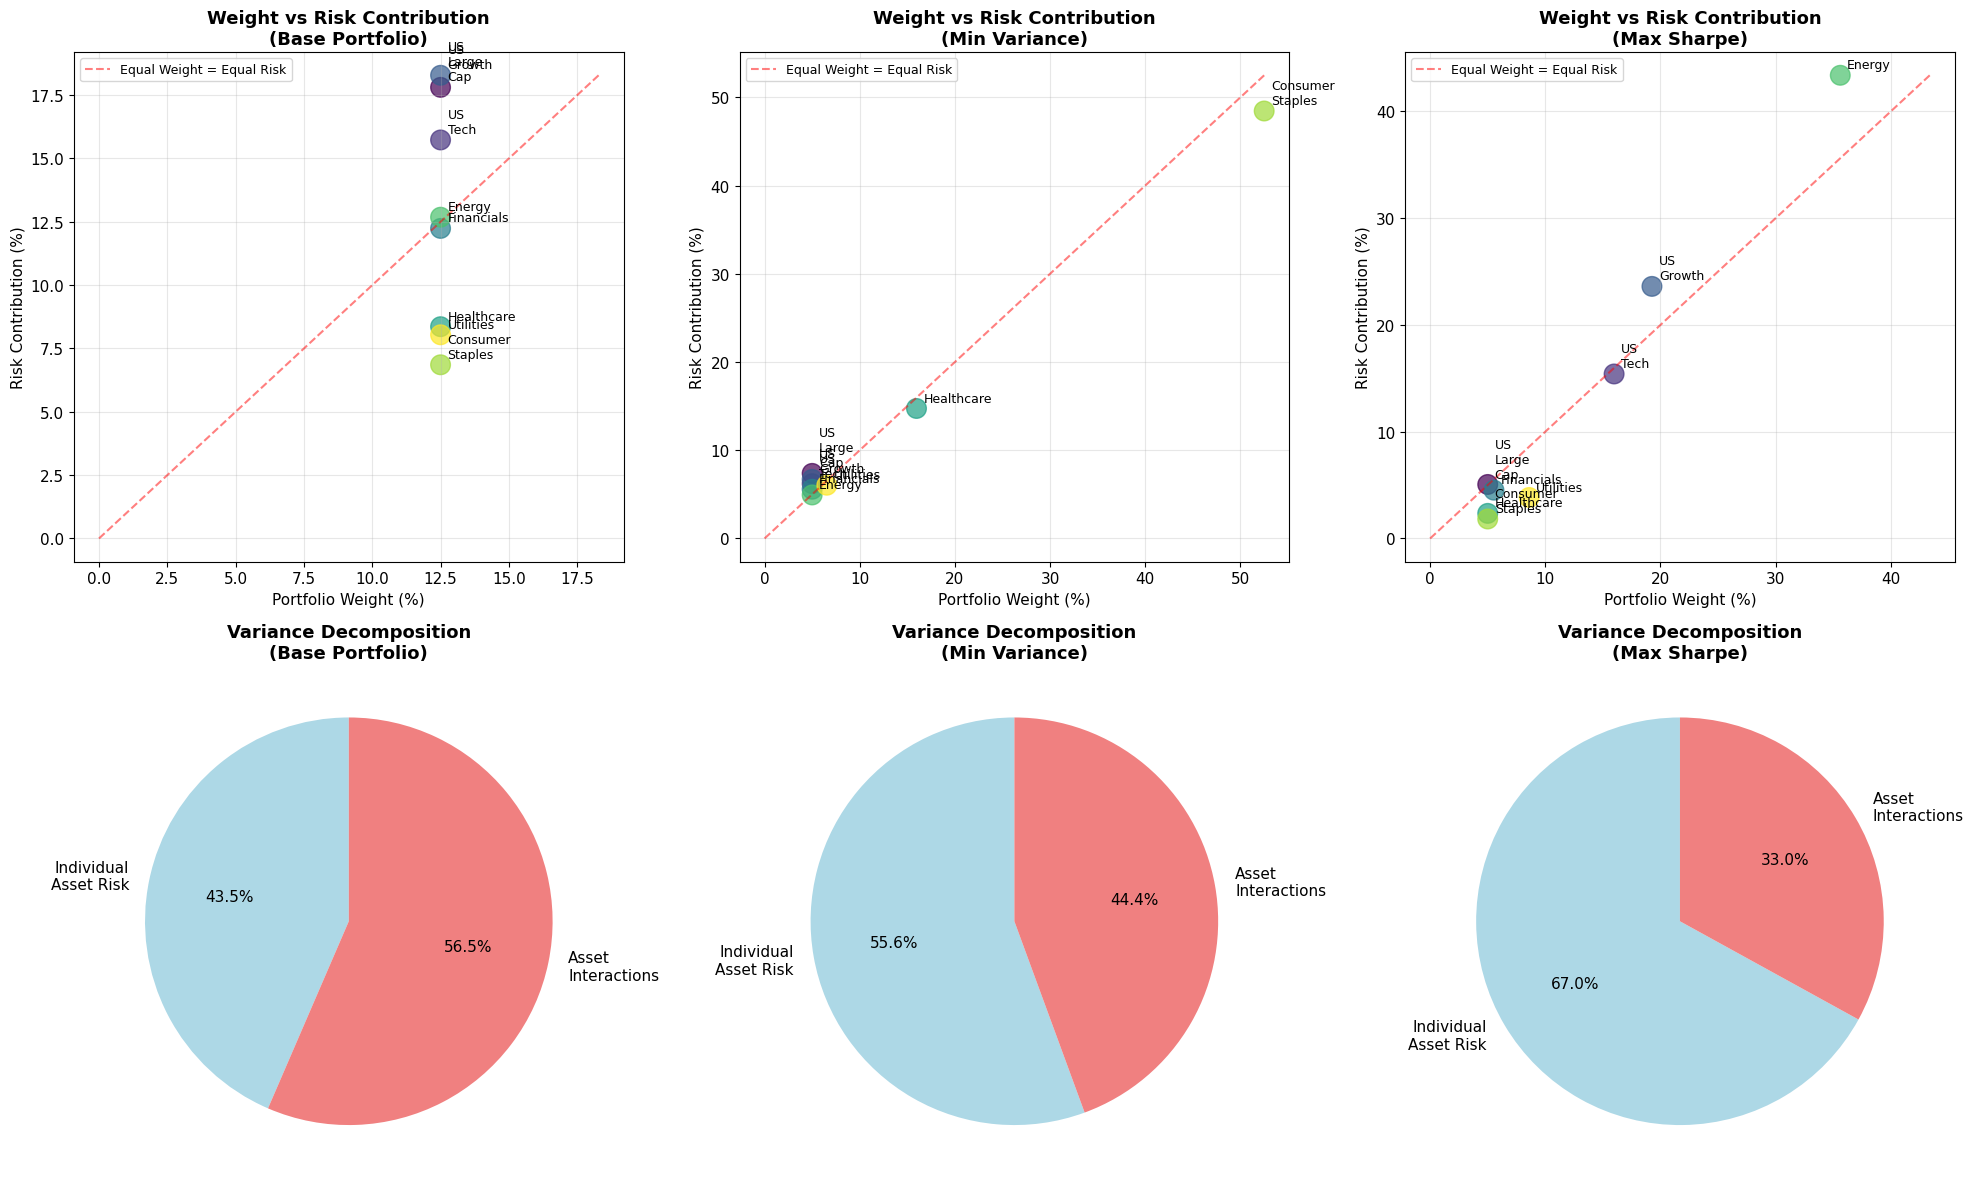


💡 Risk Decomposition Insights:
• Assets with Risk Ratio > 1 contribute more risk than their weight
• Points above the diagonal line indicate disproportionate risk contribution
• Diversification benefits come from negative/low correlations
• Optimal portfolios balance individual risk and interaction effects
• Compare variance decomposition across portfolios to see diversification structure

📊 Portfolio Efficiency Summary:
        Portfolio  Diversification Benefit %  Risk Concentration  Effective Risk Assets
0  Base Portfolio                     30.096               0.139                  7.189
1    Min Variance                     24.937               0.279                  3.579
2      Max Sharpe                     29.900               0.275                  3.640


In [18]:
# Visualization of risk decomposition
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 12))

portfolio_names = list(risk_analyses.keys())
colors = ['orange', 'green', 'red']

# First row: Weight % vs Risk Contrib % for each portfolio
axes_row1 = [ax1, ax2, ax3]

for idx, (portfolio_name, color, ax) in enumerate(zip(portfolio_names, colors, axes_row1)):
    portfolio_analysis = pd.DataFrame(risk_analyses[portfolio_name]['component_analysis'])

    # Scatter plot
    ax.scatter(portfolio_analysis['Weight %'], portfolio_analysis['Risk Contrib %'],
               s=200, alpha=0.7, c=range(len(asset_names)), cmap='viridis')

    # Annotate each asset
    for i, asset in enumerate(asset_names):
        ax.annotate(asset.replace('_', '\n'),
                    (portfolio_analysis.iloc[i]['Weight %'], portfolio_analysis.iloc[i]['Risk Contrib %']),
                    xytext=(5, 5), textcoords='offset points', fontsize=9)

    # Add diagonal line (equal weight = equal risk)
    max_val = max(portfolio_analysis['Weight %'].max(), portfolio_analysis['Risk Contrib %'].max())
    ax.plot([0, max_val], [0, max_val], 'r--', alpha=0.5, label='Equal Weight = Equal Risk')

    ax.set_xlabel('Portfolio Weight (%)', fontsize=11)
    ax.set_ylabel('Risk Contribution (%)', fontsize=11)
    ax.set_title(f'Weight vs Risk Contribution\n({portfolio_name})', fontsize=13, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)


# Second row: Variance decomposition pie charts for each portfolio
axes_row2 = [ax4, ax5, ax6]
colors_pie = ['lightblue', 'lightcoral']

for idx, (portfolio_name, ax) in enumerate(zip(portfolio_names, axes_row2)):
    analysis = risk_analyses[portfolio_name]

    individual_var = analysis['total_individual_variance']
    interaction_var = analysis['total_interaction_variance']

    variance_components = [individual_var, interaction_var]
    variances = np.array(variance_components)/np.sum(np.array(variance_components))
    variance_labels = ['Individual\nAsset Risk', 'Asset\nInteractions']

    wedges, texts, autotexts = ax.pie(variances, labels=variance_labels,
                                      colors=colors_pie, autopct='%1.1f%%',
                                      startangle=90, textprops={'fontsize': 11})
    ax.set_title(f'Variance Decomposition\n({portfolio_name})', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n💡 Risk Decomposition Insights:")
print(f"• Assets with Risk Ratio > 1 contribute more risk than their weight")
print(f"• Points above the diagonal line indicate disproportionate risk contribution")
print(f"• Diversification benefits come from negative/low correlations")
print(f"• Optimal portfolios balance individual risk and interaction effects")
print(f"• Compare variance decomposition across portfolios to see diversification structure")

# Calculate and display portfolio efficiency summary
efficiency_data = []
for name in portfolio_names:
    analysis = risk_analyses[name]
    portfolio_vol = analysis['portfolio_volatility']

    # Calculate diversification metrics
    weights = portfolios_to_analyze[name]
    naive_vol = np.dot(weights, volatilities)
    diversification_benefit = (naive_vol - portfolio_vol) / naive_vol * 100

    # Risk concentration (Herfindahl index for risk)
    risk_contribs = [c['Risk Contrib %'] for c in analysis['component_analysis']]
    risk_herfindahl = sum([(rc/100)**2 for rc in risk_contribs])

    efficiency_data.append({
        'Portfolio': name,
        'Diversification Benefit %': diversification_benefit,
        'Risk Concentration': risk_herfindahl,
        'Effective Risk Assets': 1 / risk_herfindahl
    })

eff_df = pd.DataFrame(efficiency_data)

print(f"\n📊 Portfolio Efficiency Summary:")
print(eff_df.round(3).to_string(index=True))

In [11]:
variance_components

[np.float64(0.01662754713852972), np.float64(0.008192749267291312)]

---

## 5. Summary and Key Takeaways

### 🎯 What We Learned:

1. **Portfolio Volatility Formula**:
   - Portfolio risk ≠ weighted average of individual risks
   - **Correlation effects** are crucial for diversification
   - Matrix formulation: $\sigma_p^2 = \mathbf{w}^T \mathbf{\Sigma} \mathbf{w}$

2. **Diversification Mechanics**:
   - **Perfect correlation (ρ = +1.0)**: No diversification benefit
   - **Zero correlation (ρ = 0.0)**: Moderate diversification benefit  
   - **Negative correlation (ρ < 0.0)**: Maximum diversification benefit
   - Optimal diversification requires balancing return and correlation effects

3. **Portfolio Optimization**:
   - **Minimum variance**: Achieves lowest possible risk
   - **Maximum Sharpe ratio**: Best risk-adjusted returns
   - **Efficient frontier**: All optimal risk-return combinations
   - Constraints matter: position limits, no short selling, etc.

4. **Risk Decomposition**:
   - **Marginal risk contributions** show incremental risk impact
   - **Risk contributions** reveal which assets drive portfolio risk
   - **Variance decomposition**: Individual risk vs. interaction effects
   - Risk budgeting enables targeted portfolio management

### 📊 Practical Applications:

- **Asset allocation decisions**: How much to invest in each asset class
- **Portfolio rebalancing**: When and how to adjust weights
- **Risk budgeting**: Allocate risk capacity across investments
- **Stress testing**: Understand portfolio behavior under different scenarios

### 🔗 Connection to Next Topics:

This foundation in portfolio volatility prepares you for:
- **1.2 Beta Analysis**: Understanding systematic vs unsystematic risk
- **1.3 Value at Risk**: Advanced portfolio risk measurement
- **1.4 Risk Control**: Active portfolio risk management strategies

### 📚 Key Formulas to Remember:

- **Portfolio Variance**: $\sigma_p^2 = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j \sigma_{ij}$
- **Two-Asset Formula**: $\sigma_p^2 = w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2\sigma_1\sigma_2\rho_{12}$
- **Risk Contribution**: $RC_i = w_i \times \frac{(\Sigma \mathbf{w})_i}{\sigma_p}$
- **Diversification Ratio**: $DR = \frac{\sigma_p}{\sum w_i \sigma_i}$

### 💡 Key Insights:

1. **"Don't put all eggs in one basket"** - but choose baskets that move differently!
2. **Correlation is king** - it determines how much diversification benefit you get
3. **Optimization beats intuition** - mathematical approaches find better solutions
4. **Risk contributions ≠ weights** - monitor where your risk actually comes from
5. **There's no free lunch** - but diversification comes close!

---

**Practice Exercises:**
1. Build your own 4-asset portfolio and calculate its risk decomposition
2. Find the minimum variance portfolio for any set of assets
3. Analyze how changing correlations affects your efficient frontier
4. Compare risk contributions before and after optimization

**Next Lecture**: 1.2 Beta Analysis - Systematic vs unsystematic risk measurement